In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from keras.src.legacy.backend import bias_add
from sklearn.preprocessing import minmax_scale


In [22]:
df=pd.read_csv('/Users/hare/Downloads/homeprices_banglore.csv')
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [4]:
#now we need to do the scaling
from sklearn import preprocessing
sx= preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()
X_scaled=sx.fit_transform(df.drop('price',axis=1))
X_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [7]:
Y_scaled=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
Y_scaled

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [8]:
w=np.ones(shape=(2))


In [16]:
#now to execute this we need to have the values of weights and bias. so as to achieve this we will use Gradient descent
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features=X.shape[1]

    w=np.ones(shape=number_of_features)
    b=0
    cost_list=[]
    epoch_list=[]
    total_samples=X.shape[0]
    for i in range(epochs):
        y_pred=np.dot(w,X_scaled.T)+b

        w_grad=-(2/total_samples)*(X.T.dot(y_true - y_pred))
        b_grad=-(2/total_samples)*np.sum(y_true - y_pred)
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        cost=np.mean(np.square(y_true - y_pred))
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list

w,b,cost,cost_list,epoch_list=batch_gradient_descent(X_scaled,Y_scaled.reshape(Y_scaled.shape[0]),epochs=500,learning_rate=0.01)
w,b,cost

(array([0.70712464, 0.67456527]),
 np.float64(-0.23034857438407427),
 np.float64(0.0068641890429808105))

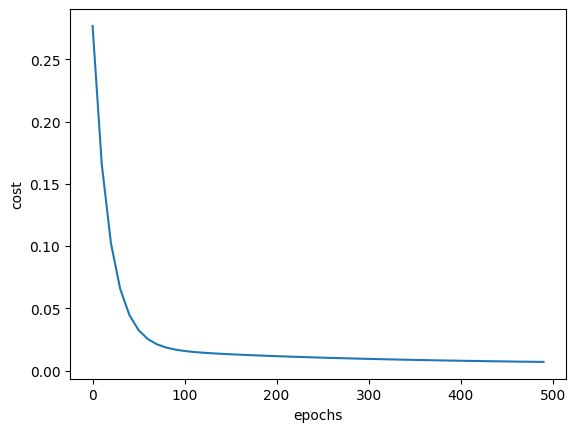

In [18]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [20]:
def predict(area,bedrooms,w,b) :
    scaled_X = sx.transform([[area,bedrooms]])[0]
    scaled_price = w[0]*scaled_X[0] + w[1] * scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]
predict (2600,4,w,b)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(128.45484403267596)

In [ ]:
predict(3000,5,w,b)

In [23]:
import random
random.randint(0,10)

3

In [35]:
def stochastic_gradient_descent(X, Y_true, epochs, learning_rate = 0.01):
    number_of_features = X. shape [1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones (shape=(number_of_features))
    total_samples = X.shape[0]
    b=[0]
    cost_list = []
    epoch_list = []
    for i in range (epochs):
        random_index=random.randint(0,total_samples-1)
        x_scaled=X[random_index]
        y_scaled=Y_true[random_index]
        y_pred=np.dot(w,x_scaled.T)+b
        w_grad=-(2/total_samples)*(X.T.dot(Y_true - y_pred))
        b_grad=-(2/total_samples)*np.sum(Y_true - y_pred)
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        cost=np.mean(np.square(Y_true - y_pred))
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
            print(cost)
    return w,b,cost,cost_list,epoch_list
w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd=stochastic_gradient_descent(X_scaled,Y_scaled.reshape(Y_scaled.shape[0]),epochs=50000,learning_rate=0.01)
w_sgd,b_sgd,cost_sgd

0.18046691775875937
0.3409994230299201
0.10065809740664666
0.11414180579428386
0.10029206157746433
0.11352440600912769
0.12044764891824071
2.6153079409443585
1.4341652081414973
0.8397880857458997
0.10334454338189014
0.10242429388785088
3.8258074573863228
1.0682862525388281
0.1508253429116873
0.11895964983137888
9.299314015985404
1.8062050158033702
0.37918241346642845
0.7447882342477481
0.09987751834402185
1.1133736841960322
7.2499189889775595
3.041820800384907
0.34350672048255304
3.423434507939503
0.16451048674782198
0.16098203464663668
0.10536146414237599
0.24337931666985413
2.9459664774215892
6.091150580439772
0.31997114480505917
0.12960189848964365
6.070541038607191
9.128783787456719
16.65706529742231
30.307069820825557
18.290028906029168
40.44716939706801
6.08179743352746
9.681237797592292
21.374489216023854
8.148733649386717
8.187758537263814
2.010830943394045
8.876628880491467
6.212037568310427
2.5090379692610245
18.95908702127213
1.7768896517313064
7.797548175101656
11.770657822

(array([74.59131046, 46.0829684 ]),
 array([-47.31792228]),
 np.float64(1537.0454593886918))

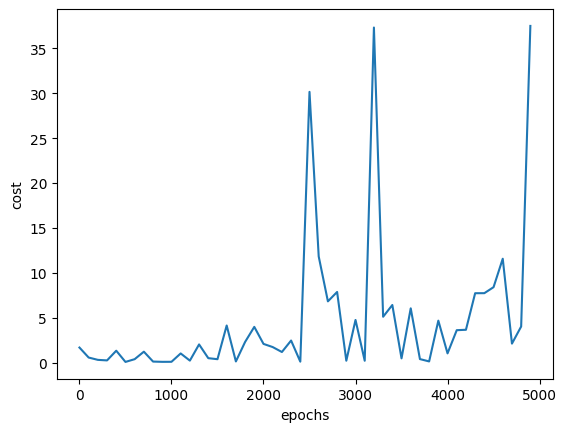

In [33]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoch_list_sgd,cost_list_sgd)